Библиотеки для работы с данными и математики

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sn

Получение данных

In [119]:
df = pd.read_csv('../resources/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Нечисловых категориальных признаков не обнаружено.
Приступим к анализу данных

In [120]:
for col_name, params in df.items():
    count = len(params)
    mean = sum(params) / count
    min_value = min(params)
    max_value = max(params)
    
    # Рассчитаем стандартное отклонение σ = √(Σ(xi - x̄)^2 / (n - 1))
    denominator = count - 1
    numerator = 0
    for value in params:
        numerator += (value - mean)**2
    standard_deviation = (numerator / denominator)**(1/2)
    
    # Расчёт квантилей
    
    # Квантиль - это число, которое разделяет упорядоченную выборку на две части, так,
    # что определенная доля значений находится в каждой из них.
    sorted_params = sorted(params)
    q25 = None
    q50 = None
    q75 = None
    tmp_count = 0
    for val in sorted_params:
        tmp_count += 1
        if q25 is None and tmp_count / count > 0.25:
            q25 = val
        if q50 is None and tmp_count / count > 0.50:
            q50 = val
        if q75 is None and tmp_count / count > 0.75:
            q75 = val
            break
            
    # Вывод данных для колонки
    print("Название столбца: ", col_name)
    print("Среднее значение: ", mean)
    print("Максимальное значение: ", max_value)
    print("Минимальное значение: ", min_value)
    print("Стандартное отклонение: ", standard_deviation)
    print("Квантиль 0.25: ", q25)
    print("Квантиль 0.50: ", q50)
    print("Квантиль 0.75: ", q75)
    print("")

Название столбца:  Pregnancies
Среднее значение:  3.8450520833333335
Максимальное значение:  17
Минимальное значение:  0
Стандартное отклонение:  3.3695780626988623
Квантиль 0.25:  1
Квантиль 0.50:  3
Квантиль 0.75:  6

Название столбца:  Glucose
Среднее значение:  120.89453125
Максимальное значение:  199
Минимальное значение:  0
Стандартное отклонение:  31.97261819513622
Квантиль 0.25:  99
Квантиль 0.50:  117
Квантиль 0.75:  141

Название столбца:  BloodPressure
Среднее значение:  69.10546875
Максимальное значение:  122
Минимальное значение:  0
Стандартное отклонение:  19.355807170644777
Квантиль 0.25:  62
Квантиль 0.50:  72
Квантиль 0.75:  80

Название столбца:  SkinThickness
Среднее значение:  20.536458333333332
Максимальное значение:  99
Минимальное значение:  0
Стандартное отклонение:  15.952217567727677
Квантиль 0.25:  0
Квантиль 0.50:  23
Квантиль 0.75:  32

Название столбца:  Insulin
Среднее значение:  79.79947916666667
Максимальное значение:  846
Минимальное значение:  0
Станд

Проверим на наличие null значений

In [121]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64
 
Glucose
Glucose
False    768
Name: count, dtype: int64
 
BloodPressure
BloodPressure
False    768
Name: count, dtype: int64
 
SkinThickness
SkinThickness
False    768
Name: count, dtype: int64
 
Insulin
Insulin
False    768
Name: count, dtype: int64
 
BMI
BMI
False    768
Name: count, dtype: int64
 
Pedigree
Pedigree
False    768
Name: count, dtype: int64
 
Age
Age
False    768
Name: count, dtype: int64
 
Outcome
Outcome
False    768
Name: count, dtype: int64
 


Разделим данные на независимые признаки и зависимые переменные

In [122]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

Визуализация распределения данных до нормировки

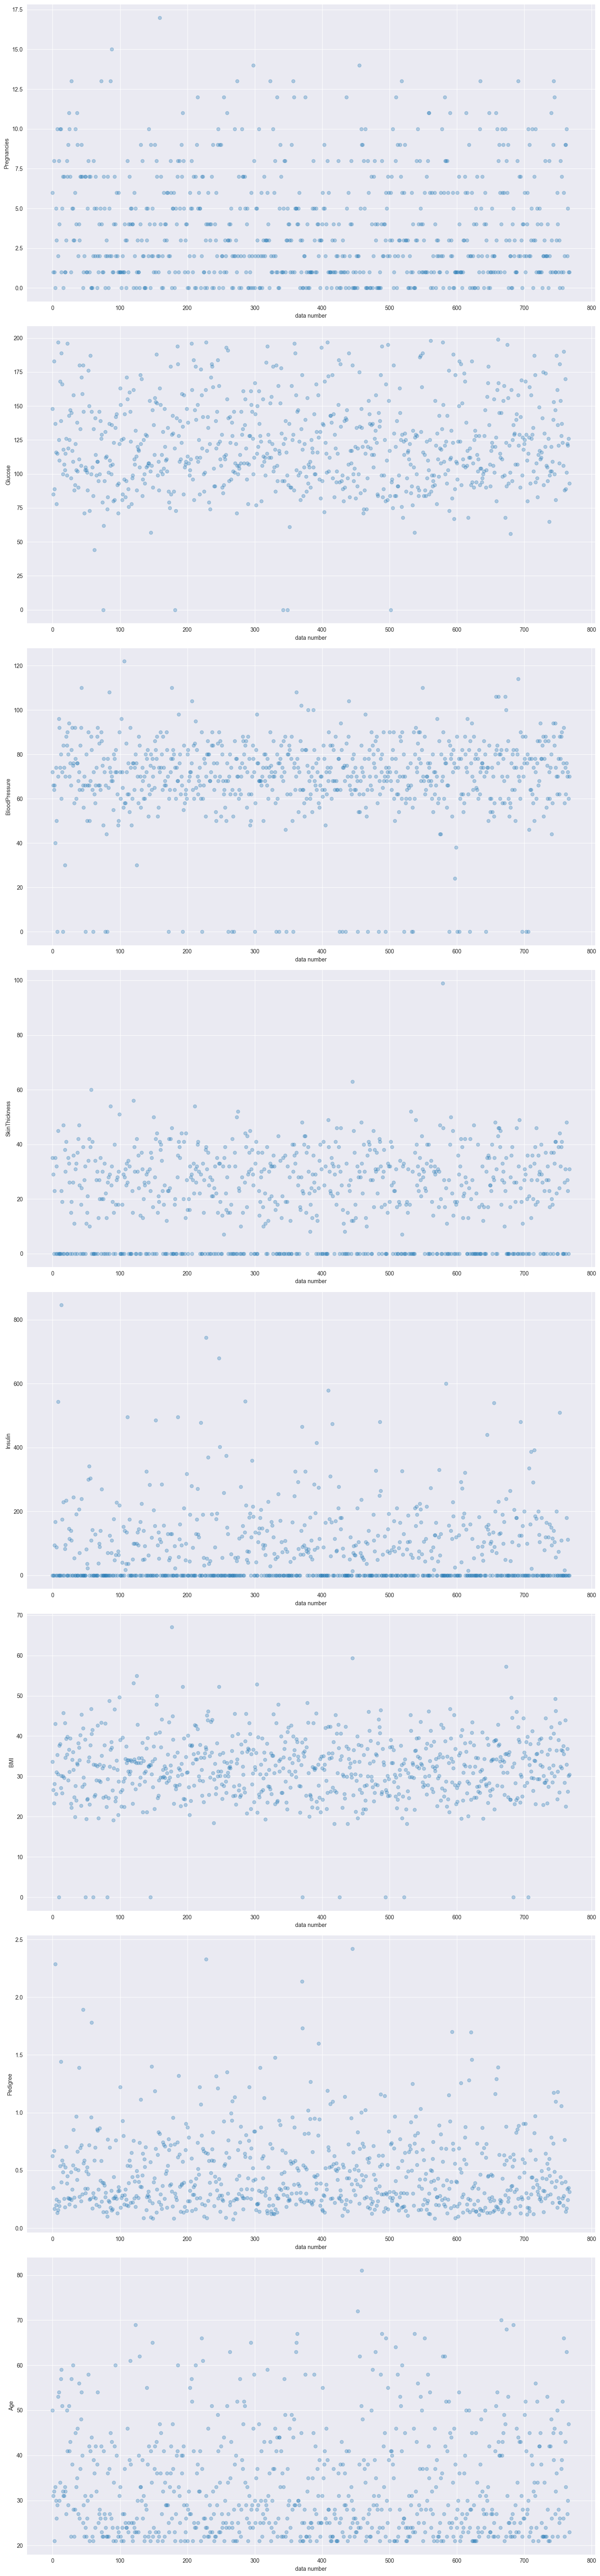

In [123]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Исходя из графиков распределения обнаружены невалидные данные:
Glucose != 0
BloodPressure != 0
SkinThickness != 0
Insulin != 0
BMI != 0
Заменим нулевые значения в этих столбцах средними значениями ненулевых по столбцам.

In [124]:
nullable_cols = {"Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"}

for col_name in nullable_cols:
    not_null_mean = X[X[col_name] != 0][col_name].mean()
    X[col_name] = X[col_name].astype(float)
    X.loc[X[col_name] == 0, col_name] = not_null_mean

Визуализируем распределение данных после заполнения пустых значений

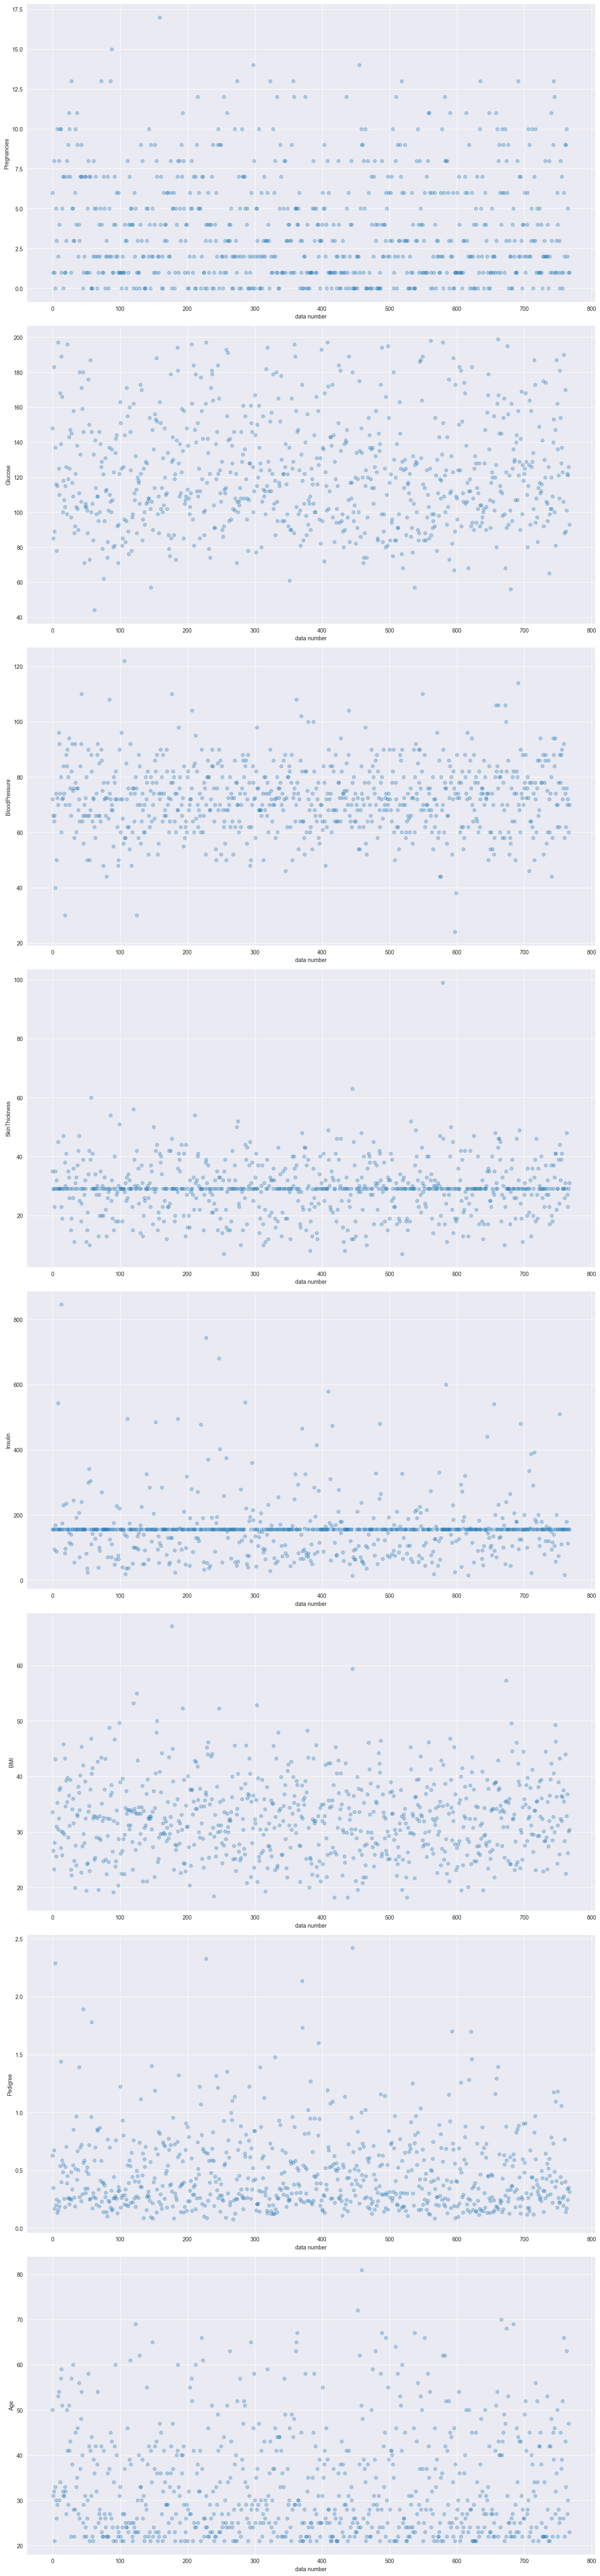

In [125]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Матрица коэффициентов корреляции Пирсона

In [126]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519
Pedigree,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000


Проведем нормализацию данных при помощи min-max где X = (x - x_min) / (x_max - x_min)

In [127]:
for column_name, params in X.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X[column_name] = (X[column_name] - minimum) / difference

Визуализируем распределение данных после нормировки

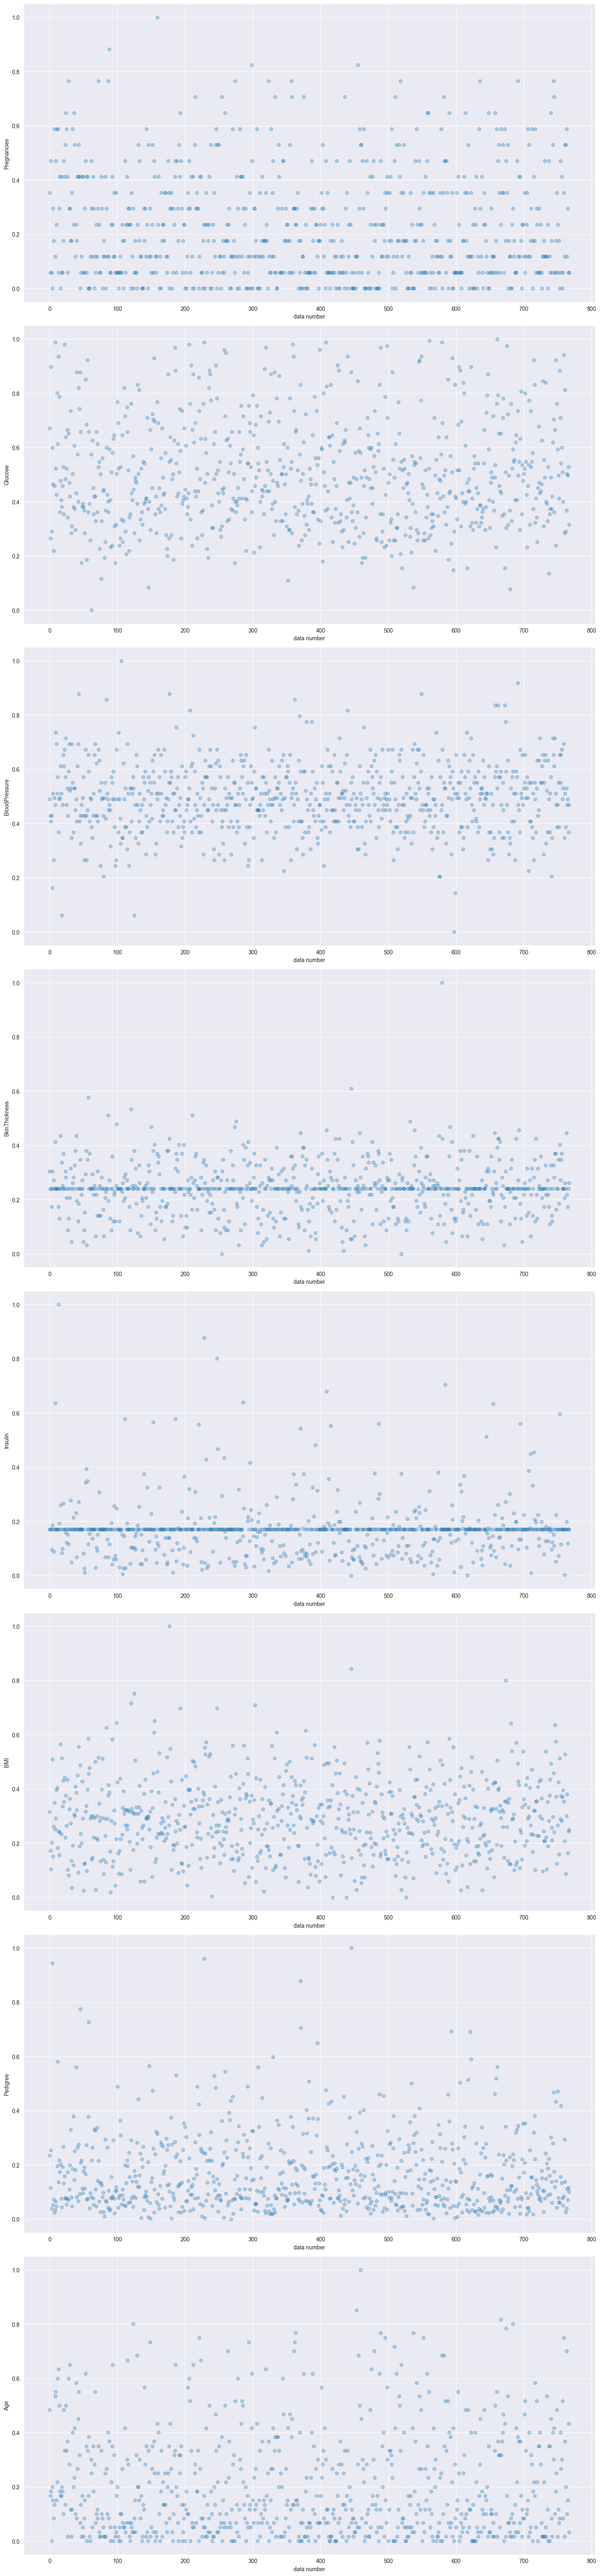

In [128]:
columns = X.columns

fig, axes = plt.subplots(len(columns), 1, figsize=(15, len(columns)*8))

for i, column in enumerate(columns):
    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
    axes[i].set_xlabel('data number')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Теперь разделим на тренировочную и тестовую выборки в соотношении 2 : 8

In [129]:
indexes = list(range(len(X)))
test_size = 0.2
random.seed(42)
random.shuffle(indexes)
split_index = int(len(X) * test_size)

X_train = X.iloc[indexes[split_index:]]
X_test = X.iloc[indexes[:split_index]]
Y_train = Y.iloc[indexes[split_index:]]
Y_test = Y.iloc[indexes[:split_index]]

In [130]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
489,0.470588,0.967742,0.571429,0.240798,0.170130,0.161554,0.201964,0.766667
451,0.117647,0.580645,0.469388,0.240798,0.170130,0.218814,0.198121,0.033333
637,0.117647,0.322581,0.530612,0.119565,0.062500,0.274029,0.243809,0.033333
399,0.176471,0.961290,0.469388,0.260870,0.170130,0.341513,0.069599,0.066667
452,0.000000,0.303226,0.448980,0.271739,0.235577,0.443763,0.129377,0.066667
...,...,...,...,...,...,...,...,...
281,0.588235,0.548387,0.530612,0.228261,0.129808,0.361963,0.086251,0.300000
759,0.352941,0.941935,0.693878,0.240798,0.170130,0.353783,0.085397,0.750000
25,0.588235,0.522581,0.469388,0.206522,0.121394,0.263804,0.054227,0.333333
114,0.411765,0.748387,0.306122,0.271739,0.193510,0.251534,0.217763,0.300000


In [131]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
490,0.117647,0.251613,0.418367,0.228261,0.062500,0.380368,0.235269,0.050000
593,0.117647,0.245161,0.285714,0.163043,0.121394,0.210634,0.692143,0.066667
719,0.294118,0.341935,0.530612,0.217391,0.170130,0.355828,0.128096,0.516667
174,0.117647,0.200000,0.408163,0.184783,0.049279,0.235174,0.124680,0.200000
595,0.000000,0.929032,0.591837,0.076087,0.205529,0.282209,0.257899,0.016667
...,...,...,...,...,...,...,...,...
138,0.000000,0.548387,0.571429,0.240798,0.170130,0.265849,0.266866,0.133333
358,0.705882,0.283871,0.510204,0.358696,0.048077,0.349693,0.128096,0.450000
378,0.235294,0.722581,0.520408,0.240798,0.170130,0.615542,0.068318,0.183333
555,0.411765,0.516129,0.469388,0.282609,0.241587,0.149284,0.035440,0.266667


In [132]:
Y_train

489    0
451    1
637    0
399    1
452    0
      ..
281    0
759    1
25     1
114    1
654    0
Name: Outcome, Length: 615, dtype: int64

In [133]:
Y_test

490    0
593    0
719    1
174    0
595    1
      ..
138    0
358    0
378    1
555    0
547    0
Name: Outcome, Length: 153, dtype: int64

Реализация логистической регрессии

Определим:
- Функцию для вычисления гипотезы (sigmoid function).
- Функцию для вычисления функции потерь (log loss)

In [134]:
def sigmoid_function(t):
    return 1 / (1 + np.exp(-t))

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Метод градиентного спуска

In [135]:
def gradient_descent(x_train, y_train, iterations, learning_rate):
    objects_num, characteristics_num = x_train.shape

    weights = np.zeros(characteristics_num)
    losses = []
    bias = 0

    for iteration in range(1, iterations + 1):

        t = np.dot(x_train, weights) + bias
        #  prediction
        z = sigmoid_function(t)

        #  ЧП стоимости по весам
        dw = (1 / objects_num) * np.dot(x_train.T, (z - y_train))
        #  ЧП стоимости по смещению
        db = (1 / objects_num) * np.sum(z - y_train)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        if iteration % 100 == 0:
            loss = log_loss(y_train, z)
            losses.append(loss)

    coefficient = {'weights': weights, 'bias': bias}
    return coefficient, losses

Предсказание результата

In [136]:
def predict(x_test, coefficient):
    weights = coefficient['weights']
    bias = coefficient['bias']
    t = np.dot(x_test, weights) + bias
    z = sigmoid_function(t)

    return (z > 0.6).astype(int)

Проверка работоспособности модели

In [137]:
coefficient, losses = gradient_descent(X_train, Y_train, 5000, 0.2)
predict(X_train, coefficient)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

Коэффициент обучения (learning rate): Этот параметр определяет размер шага, который используется для обновления значений
коэффициентов модели на каждой итерации градиентного спуска.
Количество итераций: Это количество раз, которое алгоритм градиентного спуска будет выполнять обновление коэффициентов модели.

Определим класс для анализа результатов оптимальных значений и количества итераций

In [138]:
class ResultAnalysis:
    def __init__(self, learning_rate, iterations_number, accuracy, precision, recall, f1_score, losses):
        self.learning_rate = learning_rate
        self.iterations_number = iterations_number
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1_score = f1_score
        self.losses = losses
    
    def __str__(self):
        return f'learning rate = {round(self.learning_rate, 3)}; iterations number = {round(self.iterations_number, 3)}; accuracy = {round(self.accuracy, 3)}; precision = {round(self.precision, 3)}; recall = {round(self.recall, 3)}; f1_score = {round(self.f1_score, 3)}; losses = {round(self.losses, 3)}'

Анализ значений

In [140]:
iterations = list(range(50, 1001))
rates = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.375, 0.5]
#iterations = [100, 1000, 5000]
results = []

for rate in rates:
    for iteration in iterations:
        
        coefficient, losses = gradient_descent(X_train, Y_train, iteration, rate)
        prediction = predict(X_test, coefficient)
        
        TP = np.sum((prediction == 1) & (Y_test == 1))
        TN = np.sum((prediction == 0) & (Y_test == 0))
        FP = np.sum((prediction == 1) & (Y_test == 0))
        FN = np.sum((prediction == 0) & (Y_test == 1))
        
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
        if losses:
            loss = losses[0] - losses[len(losses) - 1]
        else: loss = "-"
        
        results.append(ResultAnalysis(rate, iteration, accuracy, precision, recall, f1_score, loss))


In [143]:
for result in results:
    print(result)

TypeError: type str doesn't define __round__ method

Вычислим лучший вариант

In [142]:
best_case = results[0]

for result in results:
    if result.f1_score > best_case.f1_score:
        best_case = result

print(best_case)

learning rate = 0.5; iterations number = 753; accuracy = 0.752; precision = 0.829 precision = 0.829; recall = 0.475; f1_score = 0.604; losses = 0.092
